In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = "darkgrid")

In [3]:
cols = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety', 'output']
cars = pd.read_csv('./data/car_evaluation.csv', names = cols, header = None)

<AxesSubplot:ylabel='output'>

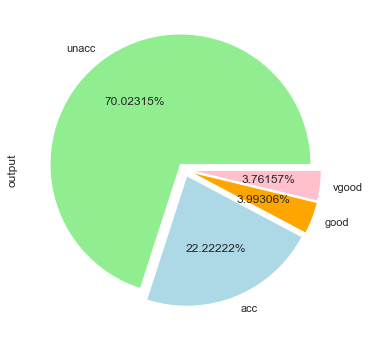

In [5]:
plot_size = plt.rcParams["figure.figsize"]
plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size
cars.output.value_counts().plot(kind = 'pie', autopct = '%0.05f%%', colors = ['lightgreen', 'lightblue', 'orange', 'pink'],
                                explode = (0.05, 0.05, 0.05, 0.05))

In [8]:
price = pd.get_dummies(cars.price, prefix = 'price')
maint = pd.get_dummies(cars.maint, prefix = 'maint')
doors = pd.get_dummies(cars.doors, prefix = 'doors')
persons = pd.get_dummies(cars.persons, prefix = 'persons')
lug_capacity = pd.get_dummies(cars.lug_capacity, prefix = 'lug_capacity')
safety = pd.get_dummies(cars.safety, prefix = 'safety')
labels = pd.get_dummies(cars.output, prefix = 'condition')

X = pd.concat([price, maint, doors, persons, lug_capacity, safety] , axis = 1)
Y = labels.values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [13]:
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model

input_layer = Input(shape = (X.shape[1],))
dense_layer_1 = Dense(15, activation = 'relu')(input_layer)
dense_layer_2 = Dense(10, activation = 'relu')(dense_layer_1)
output = Dense(Y.shape[1], activation = 'softmax')(dense_layer_2)

model = Model(inputs = input_layer, outputs = output)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 21)]              0         
                                                                 
 dense_3 (Dense)             (None, 15)                330       
                                                                 
 dense_4 (Dense)             (None, 10)                160       
                                                                 
 dense_5 (Dense)             (None, 4)                 44        
                                                                 
Total params: 534
Trainable params: 534
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(X_train, Y_train, batch_size = 8, epochs = 50, verbose = 1, validation_split = 0.2)

Epoch 1/50
139/139 [==============================] - 2s 4ms/step - loss: 1.3282 - acc: 0.2896 - val_loss: 1.1416 - val_acc: 0.4621
Epoch 2/50
139/139 [==============================] - 0s 2ms/step - loss: 0.8564 - acc: 0.6796 - val_loss: 0.8189 - val_acc: 0.6643
Epoch 3/50
139/139 [==============================] - 0s 2ms/step - loss: 0.6150 - acc: 0.7529 - val_loss: 0.6630 - val_acc: 0.7148
Epoch 4/50
139/139 [==============================] - 0s 2ms/step - loss: 0.4815 - acc: 0.8009 - val_loss: 0.5461 - val_acc: 0.7401
Epoch 5/50
139/139 [==============================] - 0s 2ms/step - loss: 0.3966 - acc: 0.8452 - val_loss: 0.4717 - val_acc: 0.8267
Epoch 6/50
139/139 [==============================] - 0s 1ms/step - loss: 0.3485 - acc: 0.8606 - val_loss: 0.4286 - val_acc: 0.8375
Epoch 7/50
139/139 [==============================] - 0s 2ms/step - loss: 0.3173 - acc: 0.8769 - val_loss: 0.4060 - val_acc: 0.8267
Epoch 8/50
139/139 [==============================] - 0s 2ms/step - loss: 0.

In [15]:
score = model.evaluate(X_test, Y_test, verbose = 1)
print("Test Score : ", score[0])
print("Test Accuracy : ", score[1])

11/11 [==============================] - 0s 2ms/step - loss: 0.0662 - acc: 0.9769
Test Score :  0.06618161499500275
Test Accuracy :  0.9768785834312439
